# WeatherPy
----



In [3]:

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
import time
import os

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

city_weather_data = pd.read_csv('cities.csv')
city_weather_data


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
542,542,scalea,36,IT,1528905631,100,39.82,15.79,70.06,5.30
543,543,san andres,68,PH,1528905632,100,13.32,122.68,83.47,22.64
544,544,muisne,92,EC,1528905633,84,0.61,-80.02,76.90,4.63
545,545,ati,20,TD,1528905633,25,13.21,18.34,104.53,4.97


In [5]:
city_weather_data_describe = city_weather_data.describe()
city_weather_data_describe

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.00000,547.000000,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,273.00000,42.166362,1.528904e+09,70.349177,21.066051,17.467495,67.870512,8.593583
std,158.04957,35.620143,1.571072e+03,23.450997,33.360137,88.441615,16.750916,5.736229
min,0.00000,0.000000,1.528901e+09,5.000000,-54.810000,-179.170000,25.690000,0.720000
25%,136.50000,1.000000,1.528902e+09,55.500000,-5.615000,-61.405000,55.400000,3.740000
50%,273.00000,40.000000,1.528905e+09,74.000000,26.190000,19.240000,70.420000,7.310000
75%,409.50000,75.000000,1.528905e+09,89.500000,50.035000,92.485000,79.870000,12.065000
max,546.00000,100.000000,1.528906e+09,100.000000,78.220000,179.320000,112.450000,32.930000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
cd_greater_humidity = city_weather_data.loc[city_weather_data['Humidity'] > 100]

print(f'City weather data length is {len(city_weather_data)}')
print(f'Greater humidity length is {len(cd_greater_humidity)}')
cd_greater_humidity

City weather data length is 547
Greater humidity length is 0


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_data.drop(cd_greater_humidity.index, inplace=False)

print(f'Total records in clean_city_data dataframe is {len(clean_city_data)}')
clean_city_data

Total records in clean_city_data dataframe is 547


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
542,542,scalea,36,IT,1528905631,100,39.82,15.79,70.06,5.30
543,543,san andres,68,PH,1528905632,100,13.32,122.68,83.47,22.64
544,544,muisne,92,EC,1528905633,84,0.61,-80.02,76.90,4.63
545,545,ati,20,TD,1528905633,25,13.21,18.34,104.53,4.97


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
curr_date = pd.to_datetime('today').date().strftime('%m/%d/%Y')

## Latitude vs. Temperature Plot

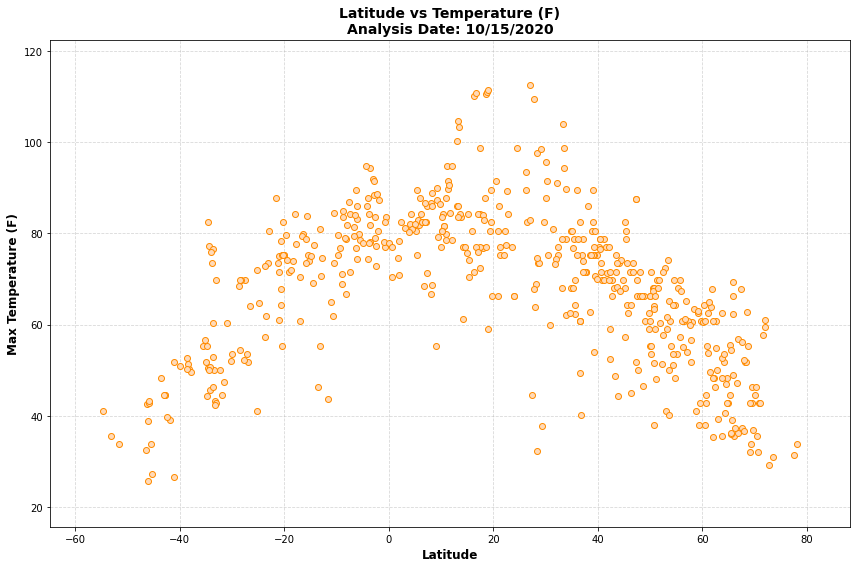

In [29]:
lat = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']

plt.figure(figsize=(12,8))
plt.scatter(x=lat, y=max_temp, marker="o", facecolors="peachpuff", edgecolors="darkorange", zorder=2)
plt.title(f"Latitude vs Temperature (F)\nAnalysis Date: {curr_date}", weight='bold', size=14)
plt.ylabel("Max Temperature (F)", weight='bold', size=12)
plt.xlabel("Latitude", weight='bold', size=12)
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(max_temp)-10, max(max_temp)+10)
plt.grid(axis='both', linestyle='--', alpha=.5, zorder=3)

plt.tight_layout()

out_file = os.path.join('..', 'visualizations', 'lats_maxtemps.png')
plt.savefig(out_file)

## Latitude vs. Humidity Plot

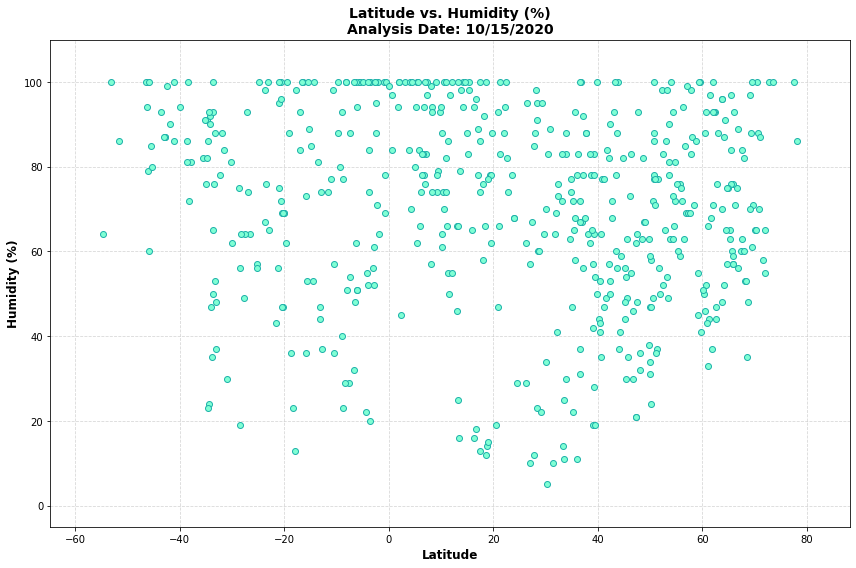

In [30]:
humidity = clean_city_data['Humidity']

plt.figure(figsize=(12,8))
plt.scatter(x=lat, y=humidity, marker="o", facecolors="aquamarine", edgecolors="lightseagreen", zorder=2)
plt.title(f"Latitude vs. Humidity (%)\nAnalysis Date: {curr_date}",weight='bold', size=14)
plt.ylabel("Humidity (%)",weight='bold', size=12)
plt.xlabel("Latitude",weight='bold', size=12)
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)
plt.grid(axis='both', linestyle='--', alpha=.5, zorder=3)

plt.tight_layout()

out_file = os.path.join('..', 'visualizations', 'lats_humidity.png')
plt.savefig(out_file)

## Latitude vs. Cloudiness Plot

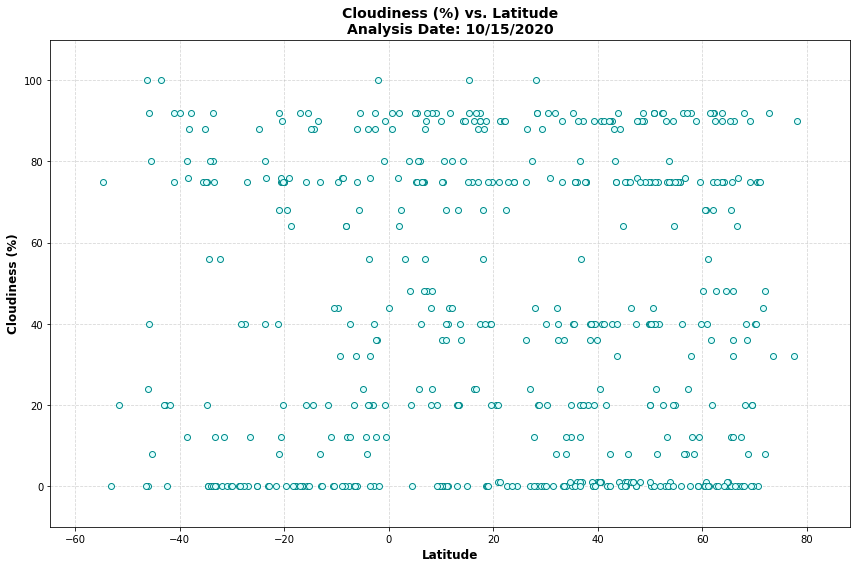

In [31]:
cloudiness = clean_city_data['Cloudiness']

plt.figure(figsize=(12,8))
plt.scatter(x=lat, y=cloudiness, marker="o", facecolors="lightcyan", edgecolors="darkcyan", zorder=2)
plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}",weight='bold', size=14)
plt.ylabel("Cloudiness (%)",weight='bold', size=12)
plt.xlabel("Latitude",weight='bold', size=12)
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)
plt.grid(axis='both', linestyle='--', alpha=.5, zorder=3)

plt.tight_layout()

out_file = os.path.join('..', 'visualizations', 'lats_cloudiness.png')
plt.savefig(out_file)

## Latitude vs. Wind Speed Plot

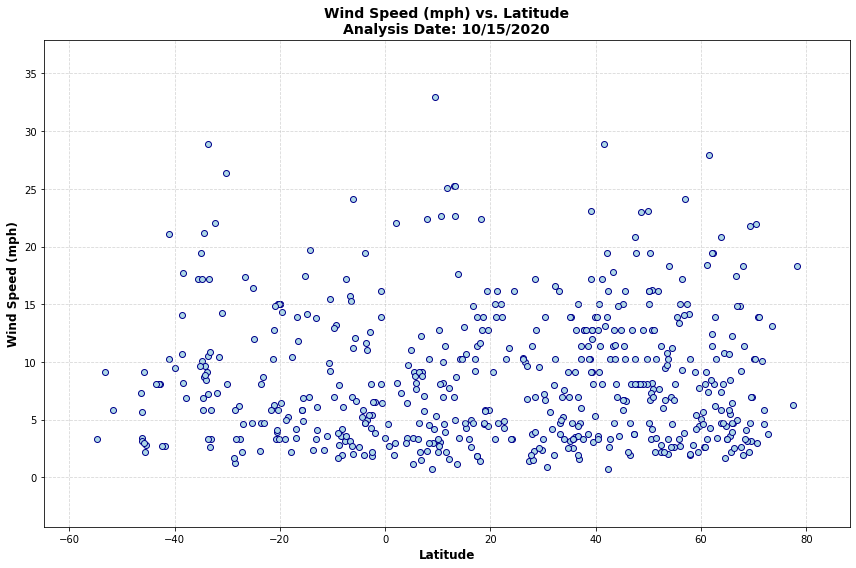

In [32]:
wind_speed = clean_city_data['Wind Speed']

plt.figure(figsize=(12,8))
plt.scatter(x=lat, y=wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")
plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}", weight='bold', size=14)
plt.ylabel("Wind Speed (mph)", weight='bold', size=12)
plt.xlabel("Latitude", weight='bold', size=12)
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind_speed)-5, max(wind_speed)+5)
plt.grid(axis='both', linestyle='--', alpha=.5, zorder=3)

plt.tight_layout()

out_file = os.path.join('..', 'visualizations', 'lats_wind_speed.png')
plt.savefig(out_file)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.817
The p-value is 1.1059735143024272e-110


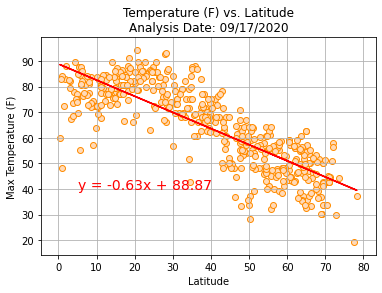

In [155]:
northern = clean_city_data.loc[clean_city_data['Lat'] >=0]
southern = clean_city_data.loc[clean_city_data['Lat'] <0]

northern_lats = northern['Lat']
northern_max_temps = northern['Max Temp']

correlation = sts.pearsonr(northern_lats, northern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_max_temps)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=northern_lats, y=northern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_max_temps)-5, max(northern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_latitude_lr_north.png"))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.699
The p-value is 1.3400898797747413e-30


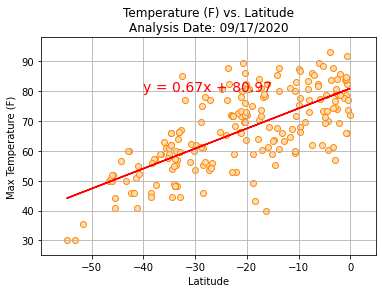

In [156]:
southern_lats = southern['Lat']
southern_max_temps = southern['Max Temp']

correlation = sts.pearsonr(southern_lats, southern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_max_temps)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-40, 80), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_max_temps)-5, max(southern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_lats_lr_south.png"))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.031
The p-value is 0.5091656849158472


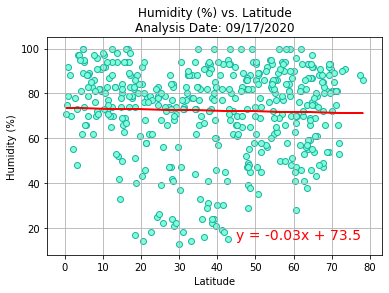

In [157]:
northern_hums = northern['Humidity']

correlation = sts.pearsonr(northern_lats, northern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_hums)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_hums)-5, max(northern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_north.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.14
The p-value is 0.04874233280947229


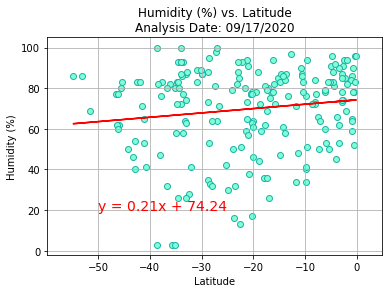

In [158]:
southern_hums = southern['Humidity']

correlation = sts.pearsonr(southern_lats, southern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_hums)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=southern_lats, y=southern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_hums)-5, max(southern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_south.png"))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.013
The p-value is 0.774613903775449


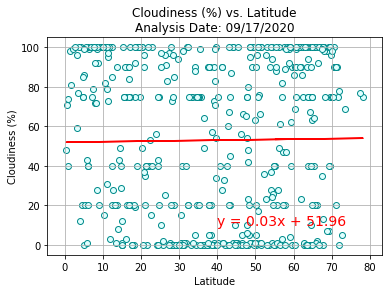

In [159]:
northern_clouds = northern['Cloudiness']

correlation = sts.pearsonr(northern_lats, northern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_clouds)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_clouds)-5, max(northern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_north.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.037
The p-value is 0.5993305188556938


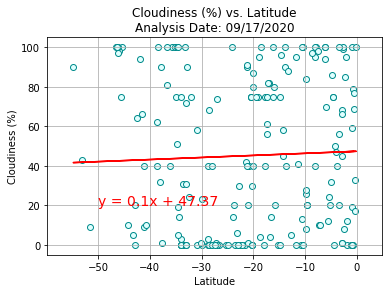

In [160]:
southern_clouds = southern['Cloudiness']

correlation = sts.pearsonr(southern_lats, southern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_clouds)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_clouds)-5, max(southern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_south.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.225
The p-value is 1.1881299071644244e-06


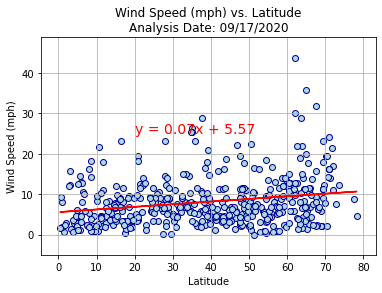

In [161]:
northern_wind_speed = northern['Wind Speed']

correlation = sts.pearsonr(northern_lats, northern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_wind_speed)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_wind_speed)-5, max(northern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_north.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.339
The p-value is 8.793179836345461e-07


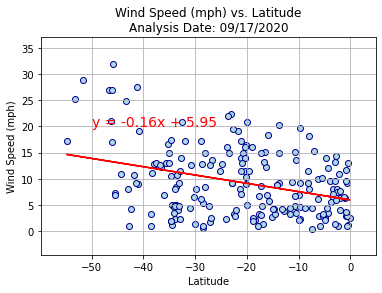

In [162]:
southern_wind_speed = southern['Wind Speed']


correlation = sts.pearsonr(southern_lats, southern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_wind_speed)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50,20), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_wind_speed)-5, max(southern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_south.png"))